<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Exercice4_Pr%C3%A9diction_conforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

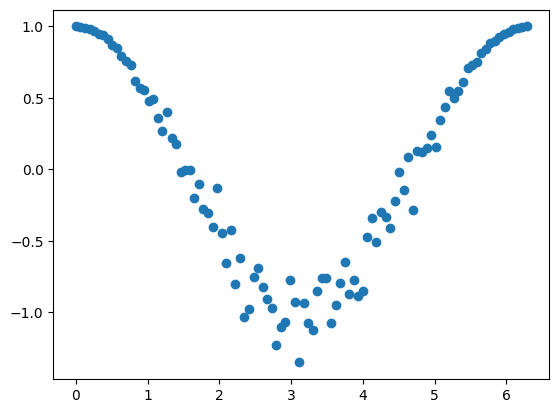

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Paramètres
sigma = 0.1
t = np.linspace(0, 2 * np.pi, 100)

# Générer le bruit
epsilon = np.random.normal(0, sigma, size=t.shape)

# Définir les fonctions
f_t = np.cos(t) + epsilon
h_t = np.cos(t) + (1 - np.cos(t)) * epsilon
a = t.reshape(-1, 1)
plt.scatter(t, h_t)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split

# Transformation des données
poly = PolynomialFeatures(degree=3)  # Exemple avec un polynôme de degré 3
X_poly = poly.fit_transform(t.reshape(-1, 1))

# Diviser les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_poly, h_t, test_size=0.2, random_state=42)

# Ajuster un modèle de régression quantile
quantile_reg = QuantileRegressor(quantile=0.5)  # Régression quantile pour la médiane
quantile_reg.fit(X_train, y_train)


QuantileRegressor()

RMSE: 0.6905835523678041


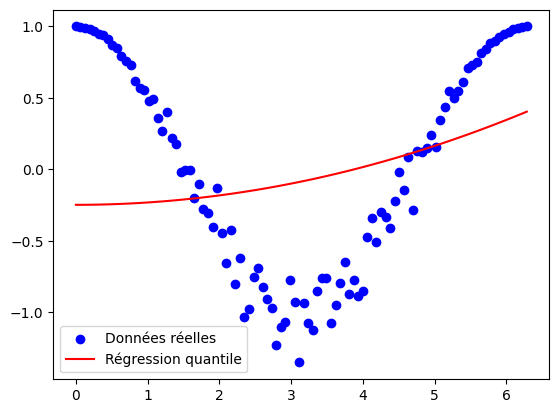

In [9]:
from sklearn.metrics import mean_squared_error

# Prédictions
y_pred = quantile_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Visualiser les résultats
import matplotlib.pyplot as plt

plt.scatter(t, h_t, color='blue', label='Données réelles')
plt.plot(t, quantile_reg.predict(X_poly), color='red', label='Régression quantile')
plt.legend()
plt.show()
